# Konvolucija

Konvolucija se može posmatrati kao kompozicija dveju funkcija od kojih jedna predstavlja signal, a druga, obično jednostavnija, filter koji se nad tim signalom primenjuje. U kontekstu obrade slika, govori se o konvoluciji matrica. Veća matrica dimenzija $m \times n$ predstavlja signal, a filter je obično znatno manja matrica, na primer, dimenzija $3 \times 3$. Počev od gornjeg levog ugla, filter polako klizi po matrici pokrivajući uvek deo veličine $3 \times 3$. Kada stigne do kraja reda, filter se spusta red niže, a postupak se ponavlja sve dok se ne dostigne donji desni ugao (videti animaciju ispod). Rezultat primene konvolucije je, takođe, matrica čije vrednosti zavise od prirode filtera i operacije koja je vršena. Na primer, često se vrši množenje odgovarajućih elemenata, a zatim se te vrednosti sabiraju ili usrednjavaju.

<img src="assets/konvolucija.png" width="400px">

<img src="assets/numerical_padding_strides.gif" width="400px">

Pomeraj (engl. stride) predstavlja veličinu pomeraja filter matrice duž x i duž y ose. U gornjem primeru to je vrednost 1 za obe ose. Proširenje (engl. padding) predstavlja dodavanje vrsta i kolona oko polazne matrice kako bi se ispunila očekivanja u pogledu dimenzija rezultujuće matrice. U zavisnosti od efekta koji treba da se postigne dodate vrste i kolone mogu sadržati određene vrednosti ili predstavljati refleksiju prvih nekoliko vrsta ili kolona polazne matrice. 

Primenom filtera se obično želi realizovati unapred definisana operacija, pa tako postoje i filteri specijalno dizajnirani za različite primene. Na primer, postoji filter za detekciju ivica, filter za izoštravanje slike, filter za zamućivanje slike i slično. Ovaj princip nalazi primenu kod konvolutivnih neuronskih mreža gde se koristi na nivou konvolutivnih slojeva za detekciju odgovarajućih karakteristika. Ovaj tip mreža s vremenom dobija na popularnosti i vrlo intenzivno se koristi u raznim zadacima, npr. u prepoznavanju objekata na slikama. Jedan zanimljiv pregled o konvolutivnim mrežama možete pronaći [ovde](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
from PIL import ImageFilter

Biblioteka `PIL` i njen `ImageFilter` paket stavljaju na raspolaganje različite filtere. Neki od njih su `BLUR`, `CONTOUR`, `DETAIL`, `EDGE_ENHANCE`, `EDGE_ENHANCE_MORE`, `EMBOSS`, `FIND_EDGES`, `SHARPEN`, `SMOOTH` i `SMOOTH_MORE`. Na primer, filter `EMBOSS` je filter koji se koristi za vizuelizaciju stepena promene boja u svakom pikselu slike.   Nakon primene ovog filtera, dobijaju se slike nalik gravurama, pa zato nosi i ovakvo ime. Funkcija kojom se može primeniti neki filter (izvršiti konvolucija) je `filter`.

Da bismo ovo demonstrirali, učitaćemo sliku `art.png`.

In [3]:
img = Image.open('data/art.png').convert('L')

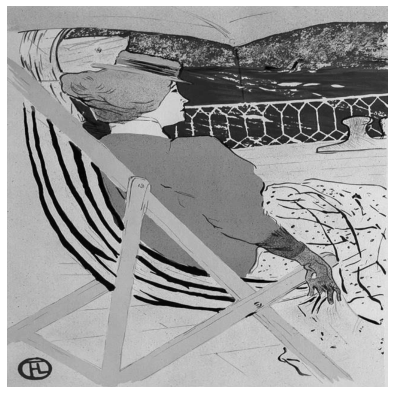

In [4]:
plt.figure(figsize=(7, 7))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

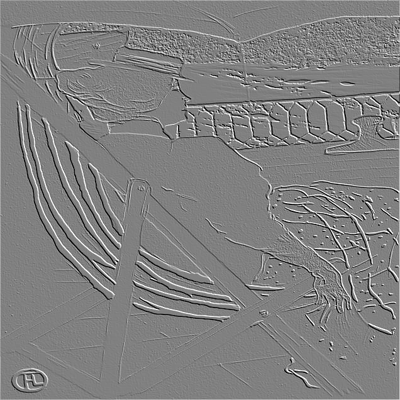

In [5]:
img_filtered = img.filter(ImageFilter.EMBOSS).resize((400, 400))
img_filtered

Možete eksperimentisati i sa drugim filterima i njihovim rezultatima. 

Za specifične efekte se dizajniraju posebni filteri. Sledeći primer ilustruje filtere kojima se može detektovati prisustvo ivica.

Konstruisaćemo tri slike predstavljene odgovarajućim *numpy* matricama dimenzija $2 \times 2$. Svojstva koje slike treba da zadovolje su:

* Prva slika treba da ima sve elemente jednake, odnosno, traba da bude jednobojna. 
* Druga slika treba da ima jednake vrednosti u prvom i jednake vrednosti u drugom redu, odnosno treba da ima dve boje i horizontalnu ivicu.
* Treća slika treba da ima jednake vrednosti u prvoj i jednake vrednosti u drugoj koloni, odnosno treba da ima dve boje i vertikalnu ivicu.

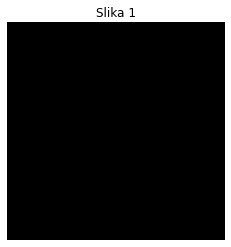

In [6]:
img1 = np.array([[1, 1], [1, 1]])
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.title('Slika 1')
plt.show()

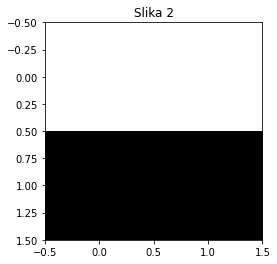

In [7]:
img2 = np.array([[1, 1], [0, 0]])
plt.imshow(img2, cmap='gray')
# ostavicemo ose da bi se video okvir oko slike
# plt.axis('off')
plt.title('Slika 2')
plt.show()

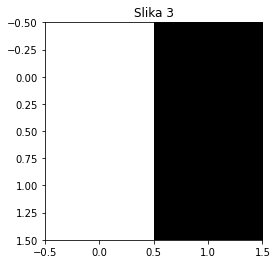

In [8]:
img3 = np.array([[1, 0], [1, 0]])
plt.imshow(img3, cmap='gray')
# ostavicemo ose da bi se video okvir oko slike
# plt.axis('off')
plt.title('Slika 3')
plt.show()

Filteri sa kojima ćemo raditi će biti predstavljeni, takođe, matricama $2 \times 2$. `hfilter` je u mogućnosti da prepoznaje horizontalne ivice. Zbog toga on ima pozitivne vrednosti u prvom, a negativne vrednosti u drugom redu. Filter se primenjuje tako što se njegovi elementi množe sa odgovarajućim elementima na slici, a zatim se vrši sumiranje. Ako ne postoji horizontalna ivica, vrednosti iz prvog i vrednosti iz drugog reda će u zbiru dati nulu, a ako postoji, dobiće se vrednost različita od nule. Na sličan način `vfilter` može da prepoznaje vertikalne ivice. 

In [9]:
hfilter = np.array([[1, 1], [-1, -1]])
vfilter = np.array([[1, -1], [1, -1]])

Funkcija `apply_filter` će biti funkcija koju ćemo koristit za konvoluciju. Matrice i filteri su istih dimenzija pa nas zapravo zanimaju samo povratne vrednosti i njihov znak. 

In [10]:
def apply_filter(img, filter):
    return np.sum(np.multiply(img, filter))

Kako prva slika nema ivice, primena oba filtera kao rezultat daje 0.

In [11]:
print('Horizontalna ivica za img1:', apply_filter(img1, hfilter))
print('Vertikalna ivica za img1:', apply_filter(img1, vfilter))

Horizontalna ivica za img1: 0
Vertikalna ivica za img1: 0


Druga slika sadrži horizontalnu ivicu, pa u tom slučaju `hfilter` daje vrednost različitu od nule. 

In [12]:
print('Horizontalna ivica za img2:', apply_filter(img2, hfilter))
print('Vertikalna ivica za img2:', apply_filter(img2, vfilter))

Horizontalna ivica za img2: 2
Vertikalna ivica za img2: 0


Slična situacija je sa trećom slikom i vertikalnim filterom.

In [13]:
print('Vertikalna ivica za img3:', apply_filter(img3, hfilter))
print('Vertikalna ivica za img3:', apply_filter(img3, vfilter))

Vertikalna ivica za img3: 0
Vertikalna ivica za img3: 2


U praksi se koriste neke predefinisane vrednosti filtera. 

`Gausov filter` (kaže se i kernel) se koristi za ujednačavanje (engl. smoothing) sadržaja slike. Jedna od matrica kojom se opisuje je $
\frac{1}{256}
\begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1 \\
\end{bmatrix}
$. 

In [14]:
gaussian_filter = (1/256) * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])

Sličnu funkciju ima i `filter usrednjavanja` opisan matricom
$ \frac{1}{16}
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 \\
\end{bmatrix}
$.

In [15]:
averaging_filter = (1/16) * np.array([
    [1, 2, 1], 
    [2, 4, 2], 
    [1, 2, 1]
])

Sada možemo predefinisati funkciju `apply_filter` tako da radi nad proizvoljnom slikom i proizvoljnim filterom. Implementacija funkcije će podržavati proširenja početne slike nulama kako bi se dobila rezultujuća slika istih dimenzija. Prilikom primene filtera koristiće se pomeraj veličine 1. 

In [16]:
def apply_filter(image, filter):
    padding = filter.shape[0] // 2

    image_padded = np.zeros((image.shape[0] + 2 * padding, image.shape[1] + 2 * padding))
    image_padded[padding:-padding, padding:-padding] = image

    filter_size = filter.shape[0]
    output = np.zeros(image.shape)

    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            image_segment = image_padded[i:i + filter_size, j:j + filter_size]
            output[i, j] = np.sum(np.multiply(image_segment, filter))

    return output

Sada možemo videti i efekat primene Gausovog filtera. 

In [20]:
image = np.array(img)

In [22]:
image_with_gaussian_filter = apply_filter(image, gaussian_filter)

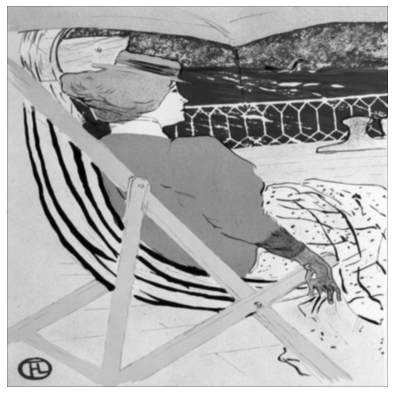

In [23]:
plt.figure(figsize=(7, 7))
plt.imshow(image_with_gaussian_filter, cmap='gray')
plt.axis('off')
plt.show()

Sličan efekat se postiže i primenom filtera usrednjavanja.

In [24]:
image_with_averaging_filter = apply_filter(image, averaging_filter)

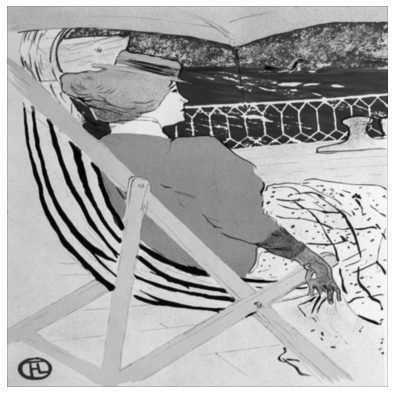

In [25]:
plt.figure(figsize=(7, 7))
plt.imshow(image_with_averaging_filter, cmap='gray')
plt.axis('off')
plt.show()

Možemo demonstrirati i transformaciju slike Sobelovim filterom koji se koristi za detekciju ivica na slikama. On je određen dvema matricama $ G_{x} = 
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{bmatrix}
$ i $ G_{y} = 
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 \\
\end{bmatrix}
$ koje detektuju promene intenziteta na slikama, redom, duž x i y ose. Finalna transformacija je određena sa $\sqrt{I_x^2 + I_y^2}$ gde $I_x$ i $I_y$ predstavljaju transformacije slike dobijene duž osa.

In [26]:
sobel_x_direction_filter = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

In [27]:
sobel_y_direction_filter = np.array([
    [-1, -2, -1],
    [0, 0, 0], 
    [1, 2, 1]
])

In [28]:
sobel_x_transformed = apply_filter(image, sobel_x_direction_filter)
sobel_y_transformed = apply_filter(image, sobel_y_direction_filter)

In [29]:
image_with_sobel_filter = np.sqrt(sobel_x_transformed**2 + sobel_y_transformed**2).astype(int)

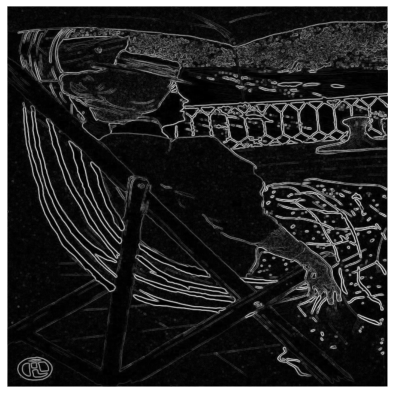

In [30]:
plt.figure(figsize=(7, 7))
plt.axis('off')
plt.imshow(image_with_sobel_filter, cmap='gray')
plt.show()

Bibliotečka podrška za rad sa konvolucijom nad slikama dolazi kroz paket `signal` i njenu funkciju `convolve2d`. Funkcija osim slike i filtera očekuje parametar `mode` kojim se kontroliše proširenje i parametar `boundary` kojim se određuje priroda proširenja. 

In [31]:
from scipy import signal

Ovim pozivom se vrši konvolucija polazne slike i Gausovog filtera uz prethodno proširenje polazne slike nulama kako bi se dobila rezultujuća slika istih dimenzija.

In [32]:
image_convolve2d = signal.convolve2d(image, gaussian_filter, mode='same', boundary='fill', fillvalue=0)

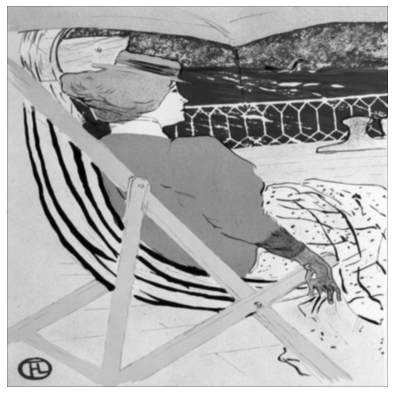

In [33]:
plt.figure(figsize=(7, 7))
plt.imshow(image_convolve2d, cmap='gray')
plt.axis('off')
plt.show()

Možemo se uveriti i da su svi pikseli ovako dobijene slike istovetni sa pikselima slike dobijene primenom naše funkcije `apply_filter`:

In [34]:
np.all(image_convolve2d == image_with_gaussian_filter)

True

I pomenuta funkcija `filter` paketa `PIL` dozvoljava rad sa manuelno konstruisanim filterima, ali uz ograničenje na filtere dimenzija 3x3 ili 5x5. Sledeći blok koda demonstrira primenu Sobelovog filtera za detekciju ivica duž x ose koji se konstruiše korišćenjem `Kernel` funkcije. Argumenti ove funkcije su dimenzije filtera, niz koeficijenata filtera i skalar kojim se deli vrednost dobijena primenom filtera na odgovarajući blok matrice. To je podrazumevano sum elemenata ili neka konstanta - u našem slučaju vrednost je 1 kako bi se izbeglo deljenje nulom.

In [35]:
sobel_x_transformed = np.array(img.filter(ImageFilter.Kernel((3, 3), (-1, 0, 1, -2, 0, 2, -1, 0, 1), 1)))

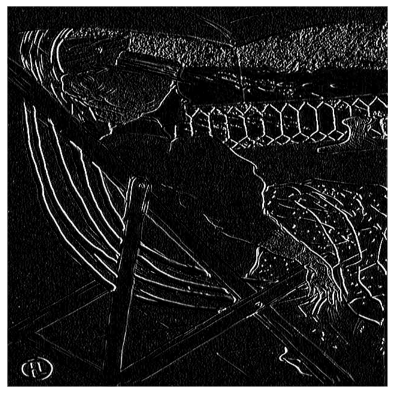

In [36]:
plt.figure(figsize=(7, 7))
plt.imshow(sobel_x_transformed, cmap='gray')
plt.axis('off')
plt.show()